In [1]:
import os

from ml.eval import eval_model
from ml.models.MySimpleCNN_Feit import MySimpleCNNInceptionModule

print(os.getcwd())
os.chdir('/home/jelinek/recetox/')

from ml.pipeline import FeitDataPipeline
from cfg import *


name = "MySimpleCnn_Feit-inception"


/home/jelinek/recetox/src/notebooks/MyCNNInception


In [10]:
pipeline = MySimpleCNNInceptionModule(train_data_dir='data/Feit_colon-annotation-tiles-256/data_train/',
                                        valid_data_dir='data/Feit_colon-annotation-tiles-256/data_valid/')

Model: "MySimpleCnnFewerLayers"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 256, 256, 32) 128         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 256, 256, 32) 128         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 256, 256, 3)  0           input_2[0][0]                    
_____________________________________________________________________________

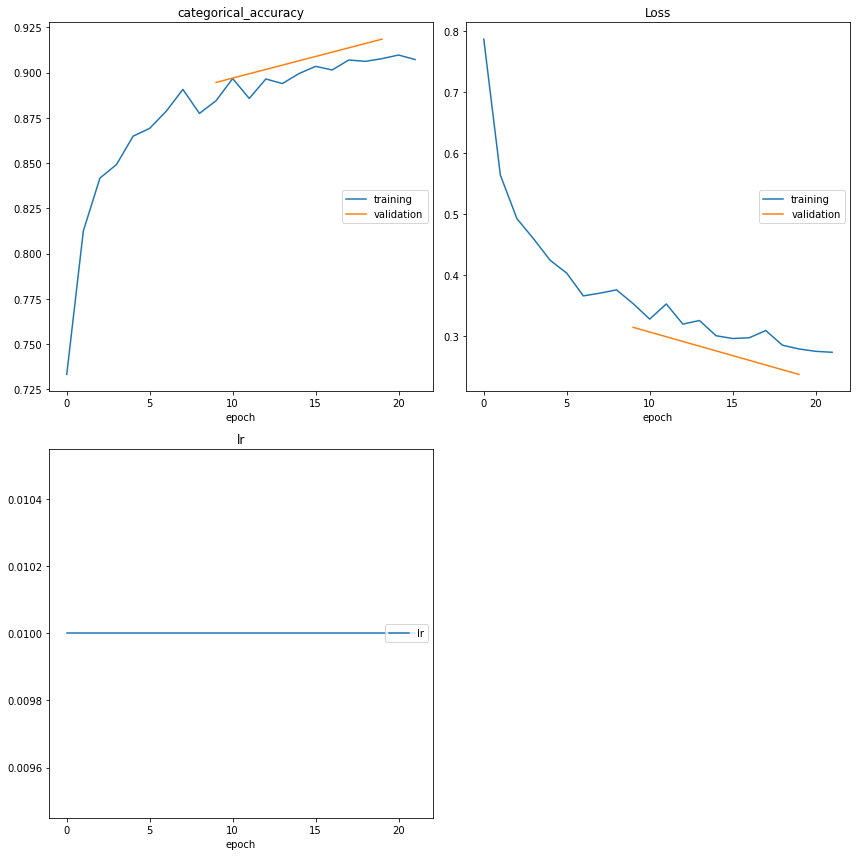

categorical_accuracy
	training         	 (min:    0.733, max:    0.910, cur:    0.907)
	validation       	 (min:    0.895, max:    0.919, cur:    0.919)
Loss
	training         	 (min:    0.273, max:    0.787, cur:    0.273)
	validation       	 (min:    0.237, max:    0.314, cur:    0.237)
lr
	lr               	 (min:    0.010, max:    0.010, cur:    0.010)
Epoch 23/200
 23/250 [=>............................] - ETA: 35s - loss: 0.2707 - categorical_accuracy: 0.8995 

KeyboardInterrupt: 

In [11]:
pipeline.execute_pipeline(perform_validation=True, perform_test_segmentation=False)

In [ ]:
pipeline.save_pipeline()

In [ ]:
eval_model(pipeline.model,
           pipeline.get_data_loader_validation(),
           pipeline_name=name,
           print_confusion_matrix=True,
           save_misclassified=True)

In [2]:
pipeline = FeitDataPipeline.load_pipeline(pipeline_name=name)

FileNotFoundError: [Errno 2] No such file or directory: 'saved-pipelines/MySimpleCnn_Feit-inception.p'

In [ ]:
from ml.eval import evaluate_segmentation_on_feit_annotation

evaluation_path = Path('data/Feit_colon-annotation_valid/')

segmentation_dir = Path('segmentations') / pipeline.params.name

evaluate_segmentation_on_feit_annotation(evaluation_path, pipeline.build_segmenter(),
                                         32, pipeline.params.class_names,
                                         save_segmentations=True, segmentations_dir=segmentation_dir,
                                         neighbourhood_size=1)
